# ALGORITHMS FOR DATA SCIENCE (by (Prof. Dmitrii Bakhitov)
## WEEK 9 TREES HOMEWORK ASSIGNMENT
## CRN:-CS-676 (74060) ; FALL 2023
## Submitted by: Piyush Gupta

### Assignment: Ensemble Learning and Tree-Based Algorithms

### Objective: To understand and implement various tree-based algorithms and ensemble methods, evaluate their performance, and interpret their results.

##  Import Necessary Libraries

1. **pandas (pd):** A comprehensive library providing high-performance, easy-to-use data structures such as DataFrames. Essential for data manipulation, cleaning, and analysis.


2. **numpy (np):** A package offering support for large, multi-dimensional arrays and matrices, along with a vast collection of high-level mathematical functions to operate on these arrays.


3. **train_test_split:** A function from the Scikit-learn library to split datasets into random train and test subsets, crucial for the model evaluation process.


4. **DecisionTreeClassifier (dtc):** A Scikit-learn class used to create a decision tree classifier, a model that predicts the value of a target variable by learning simple decision rules from the data features.


5. **accuracy_score:** Part of Scikit-learn's metrics, it measures the accuracy of a classifier in classification tasks.


6. **precision_score:** A metric from Scikit-learn that computes the precision of a classifier, reflecting its ability to not label as positive a sample that is negative.


7. **recall_score:** A metric from Scikit-learn that computes the recall, which is the ability of a classifier to find all the positive samples.


8. **f1_score:** A function from Scikit-learn that computes the F1 score, a harmonic mean of precision and recall, useful as a measure of a test's accuracy.


9. **classification_report:** A Scikit-learn function that builds a text report showing the main classification metrics.


10. **matplotlib.pyplot (plt):** A plotting library used for creating a variety of figures, histograms, power spectra, bar charts, error charts, scatter plots, etc.


11. **sklearn.preprocessing:** A module in Scikit-learn that includes scaling and normalization functions, to standardize or normalize feature vectors for machine learning algorithms.


12. **plot_tree:** A function from Scikit-learn that visually represents a decision tree classifier, showing the decision nodes and leaf nodes of the tree.


13. **BaggingClassifier:** This is a classifier from Scikit-learn's ensemble methods, which stands for Bootstrap AGGregatING. It is used to implement bagging, a technique that improves the stability and accuracy of machine learning algorithms. It involves fitting multiple instances of a base estimator on random subsets of the original dataset and then aggregating their individual predictions to form a final prediction. This approach is effective in reducing variance and helps in avoiding overfitting.


14. **RandomForestClassifier:** Also a part of Scikit-learn's ensemble methods, this classifier implements a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset. It uses averaging to improve the predictive accuracy and control over-fitting. It's highly flexible and widely used for classification and regression tasks.


15. **resample:** A utility function from Scikit-learn, used for resampling arrays or sparse matrices in a consistent way. It's primarily used in ensemble methods to create subsets of data for training base estimators in models like BaggingClassifier or RandomForestClassifier.


16. **mode:** From the SciPy stats module, this function is used to find the mode (the most common value) of an array or a sequence of numbers. It's useful in statistical analyses and is often used in ensemble methods to decide the most frequent prediction from multiple estimators.


17. **XGBClassifier:** This is a part of the XGBoost library, which stands for eXtreme Gradient Boosting. It is a highly efficient and scalable implementation of gradient boosting framework by Tianqi Chen. XGBClassifier is used for classification tasks and is known for its speed and performance. It's widely used in winning solutions of data science competitions.


18. **plot_importance:** Also from the XGBoost library, this function is used to visualize the importance of features in your dataset. It shows a chart of features sorted by their importance in the model, which is very helpful in understanding which features the model is giving most importance to.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import plot_tree 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from scipy.stats import mode
from xgboost import XGBClassifier
from xgboost import plot_importance

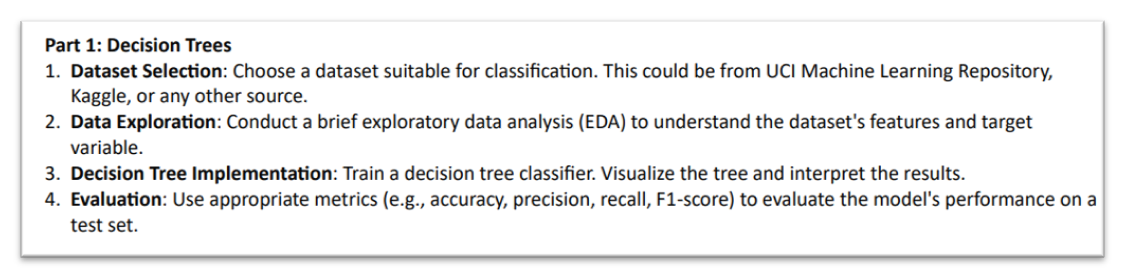

 **PART-1-  STEP 1: DATASET SELECTION (Census Income dataset chosen from UCI Machine Learning Repository to predict whether income, in dollars; exceeds 50K/yr based on census data)** 


**Credit Card Fraud Detection dataset chosen from Kaggle.The datasets contain transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.**

**The Credit Card Fraud Detection dataset is a collection of transactions made by credit cards, where the task is to classify each transaction as fraudulent or legitimate, characterized by a highly imbalanced distribution of the two classes.**

### Importing Dataset

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head() #Displaying the head of the data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**PART-1-  STEP 2: DATA EXPLORATION (Performing brief EDA to understand the features and target variable)**

**1. Checking the shape of the dataset - <br>The shape attribute of a DataFrame returns a tuple representing the dimensionality of the DataFrame. The first element of the tuple is the number of rows, and the second element is the number of columns.**

In [4]:
df.shape

(284807, 31)

**2.The df.info() method provides a concise summary of the DataFrame. This includes information like the number of non-null entries in each column, the datatype of each column, and memory usage, among others. It is particularly useful to get a quick overview of the dataset, helping identify missing values and optimize data types for more efficient storage and computation.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
duplicate = df.duplicated() #Identifying Duplicate Rows 
print(duplicate.sum()) # Sum of Duplicates
df[duplicate] #Displaying Duplicate Rows 

1081


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


### Removing Duplicate Rows - 
The df.drop_duplicates(inplace=True) method is used to remove all the duplicate rows in the DataFrame. The inplace=True parameter means that the DataFrame will be modified in place, and nothing will be returned. This action is part of the data cleaning process, ensuring that the dataset has only unique entries and is ready for analysis or model training.

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Viewing Data Types - 
Executing df.dtypes returns a Series with the data type of each column. Understanding the data types of each column is crucial as it affects what kind of operations can be performed on the columns. It helps in identifying if any column needs a type conversion.

In [9]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Statistical Summary - 
The df.describe() method is used to generate a statistical summary of the DataFrame. This includes count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values for all numeric columns. It is a useful method for a quick statistical overview and to understand the distribution of the data in the DataFrame.

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### Counting Unique Values in a Column 
The df.Class.value_counts() method is used to display the count of unique values present in the 'Class' column of the DataFrame. This is helpful in understanding the distribution of different categories or classes within the column, which is especially crucial in classification tasks to identify if the classes are balanced or imbalanced.

In [11]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

**PART-1- STEP 3: Decision Tree Implementation (Train a decision tree classifier. Visualize the tree and interpret the results)**

#### Splitting the DataFrame into Features and Target 
Segregating the dataset into features (X) and target labels (Y). The feature set includes all columns except 'Class', while the target set comprises only the 'Class' column.

In [12]:
X = df.drop(labels='Class', axis=1)
Y = df['Class']

X.shape, Y.shape

((283726, 30), (283726,))

In [13]:
# Splitting data into train and test datasets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [14]:
# Fitting the Decision Tree Classifier model using fit method

clf = dtc(criterion = 'gini', max_depth=3)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [15]:
# Making prediction to get accuracy score

y_prediction = clf.predict(X_test)
print('Accuracy = ', accuracy_score(Y_test, y_prediction))

Accuracy =  0.9992069925633524


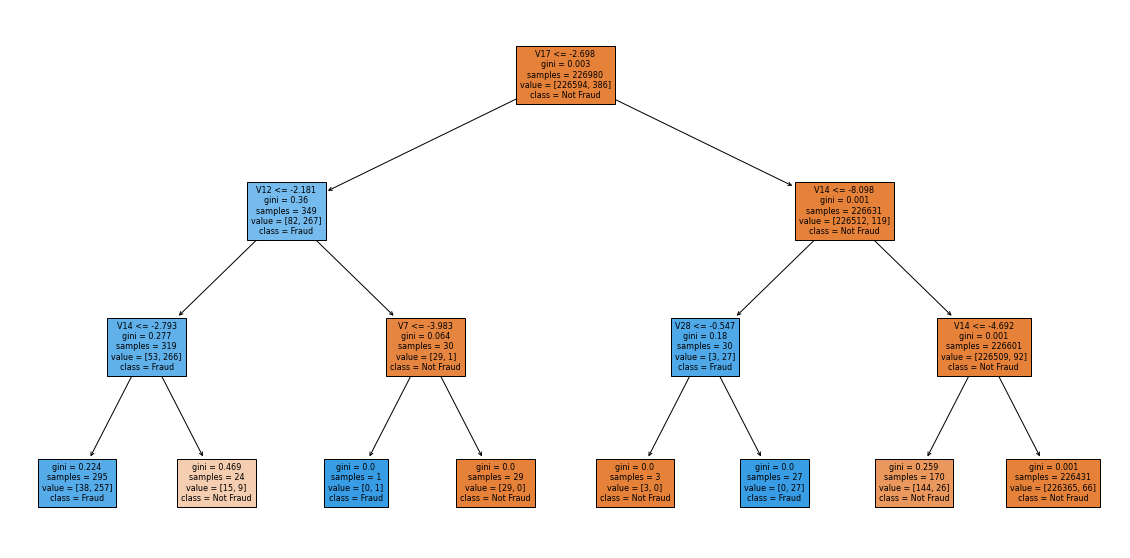

In [16]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, 
          feature_names=list(X.columns), 
          class_names=['Not Fraud', 'Fraud'], 
          filled=True, 
          fontsize=8)
plt.show()

**PART-1-STEP 4: EVALUATION (Use appropriate metrics (e.g., accuracy, precision, recall, F1-score) to evaluate the model's performance on test set)**

In [17]:
# Overall accuracy
accuracy = accuracy_score(Y_test, y_prediction)
print(f"Accuracy: {accuracy}")

# Generating Precision, recall, and F1 score values
precision = precision_score(Y_test, y_prediction, pos_label=1)
recall = recall_score(Y_test, y_prediction, pos_label=1)
f1 = f1_score(Y_test, y_prediction, pos_label=1)

print(f"Precision: {precision:}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9992069925633524
Precision: 0.7837837837837838
Recall: 0.6666666666666666
F1 Score: 0.7204968944099379


In [18]:
bagging_clf = BaggingClassifier(
    base_estimator=dtc(random_state=0),
    n_estimators=10,
    random_state=0
) # Creating 10 bootstrap samples

In [19]:
bagging_clf.fit(X_train, Y_train) # Fitting the Bagging classifier using fit method
y_prediction = bagging_clf.predict(X_test)

C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [20]:
# Calculate evaluation metrics for Bagging Classifier
accuracy_bagging = accuracy_score(Y_test, y_prediction)
precision_bagging = precision_score(Y_test, y_prediction, pos_label=1)
recall_bagging = recall_score(Y_test, y_prediction, pos_label=1)
f1_score_bagging = f1_score(Y_test, y_prediction, pos_label=1)

# Print the performance metrics
print(f"Bagging Classifier Accuracy: {accuracy_bagging}")
print(f"Bagging Classifier Precision: {precision_bagging}")
print(f"Bagging Classifier Recall: {recall_bagging}")
print(f"Bagging Classifier F1-Score: {f1_score_bagging}")

Bagging Classifier Accuracy: 0.9995065731505305
Bagging Classifier Precision: 0.9154929577464789
Bagging Classifier Recall: 0.7471264367816092
Bagging Classifier F1-Score: 0.8227848101265823


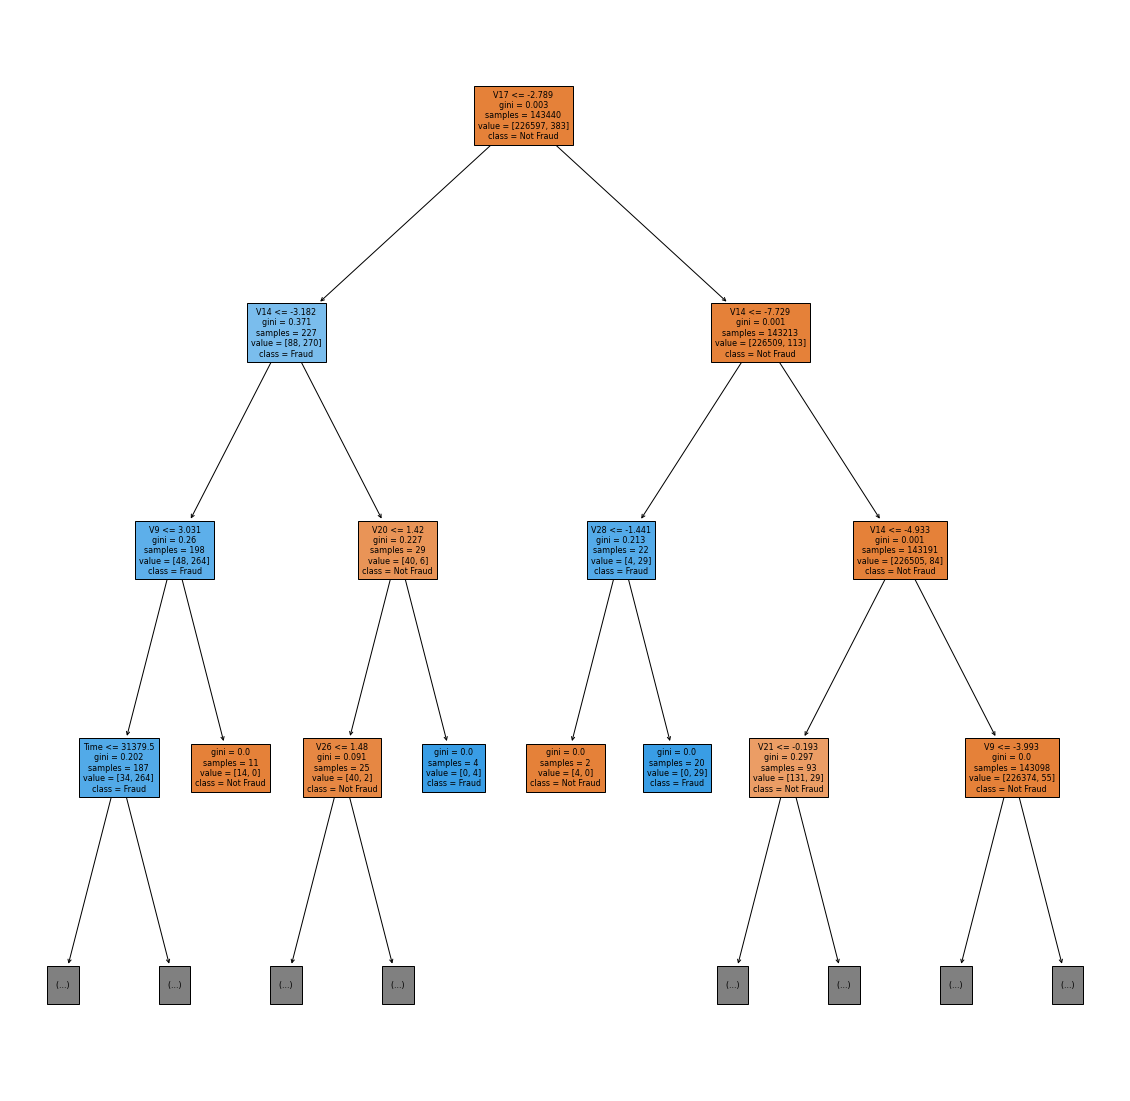

In [21]:
# Set the figure size for better visibility
plt.figure(figsize=(20, 20))

# Plot the decision tree of the fifth estimator in the ensemble
# We limit the depth to 3 for better readability
plot_tree(bagging_clf.estimators_[4], 
          feature_names=list(X.columns), 
          class_names=['Not Fraud', 'Fraud'], 
          filled=True, 
          fontsize=8, 
          max_depth=3)

# Show the plot
plt.show()

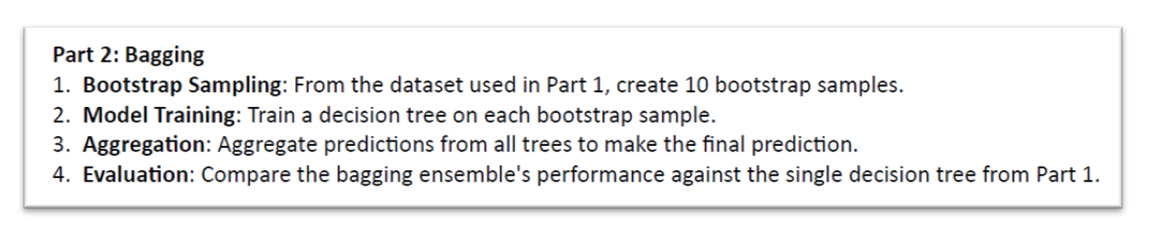

**PART-2-STEP 1: BOOTSTRAP SAMPLING (From the dataset used in Part 1, create 10 bootstrap samples)**

In [22]:
n_estimators = 10
tree_estimators = [] # Creating 10 bootstrap samples
predictions =[]

**PART-2-STEP 2: MODEL TRAINING (Train a decision tree on each bootstrap sample)**

In [23]:
for i in range(n_estimators):
    # Create a bootstrap sample from the training data
    X_train_sample, y_train_sample = resample(X_train, Y_train)
    
    # Initialize a new decision tree classifier
    tree_clf = dtc(random_state=i)
    
    # Train the classifier on the bootstrap sample
    tree_clf.fit(X_train_sample, y_train_sample)
    
    # Save the trained classifier
    tree_estimators.append(tree_clf)

**PART-2-STEP 3: AGGREGATION (Aggregate predictions from all trees to make the final prediction)**

In [24]:
# Collecting predictions manually
preds = tree_clf.predict(X_test)
print(f"Tree {i} predictions shape: {preds.shape}")  # Checking the shape of the predictions
predictions.append(preds)  # Appending predictions to the list

# Ensuring predictions is a list when attempting to append
assert isinstance(predictions, list), "Predictions should be a list"

# Converting the list of predictions to a NumPy array
predictions_array = np.array(predictions)
print(f"Combined predictions array shape: {predictions_array.shape}")

Tree 9 predictions shape: (56746,)
Combined predictions array shape: (1, 56746)


**PART-2-STEP 4: EVALUATION (Compare the bagging ensemble's performance against the single decision tree from Part 1)**

In [25]:
# Checking if the predictions array is not empty

if predictions_array.size > 0:
    # Step 2 and Step 3: Aggregate predictions by majority vote
    majority_vote_predictions = mode(predictions_array, axis=0)[0][0]

    # Evaluate the manually aggregated predictions
    accuracy_manual = accuracy_score(Y_test, majority_vote_predictions)
    precision_manual = precision_score(Y_test, majority_vote_predictions, pos_label=1)
    recall_manual = recall_score(Y_test, majority_vote_predictions, pos_label=1)
    f1_score_manual = f1_score(Y_test, majority_vote_predictions, pos_label=1)

    # Print the performance metrics
    print(f"Manual Bagging Accuracy: {accuracy_manual}")
    print(f"Manual Bagging Precision: {precision_manual}")
    print(f"Manual Bagging Recall: {recall_manual}")
    print(f"Manual Bagging F1-Score: {f1_score_manual}")
else:
    print("No predictions were made. Please check the estimators and input data.")

Manual Bagging Accuracy: 0.9991365030134283
Manual Bagging Precision: 0.69
Manual Bagging Recall: 0.7931034482758621
Manual Bagging F1-Score: 0.7379679144385026


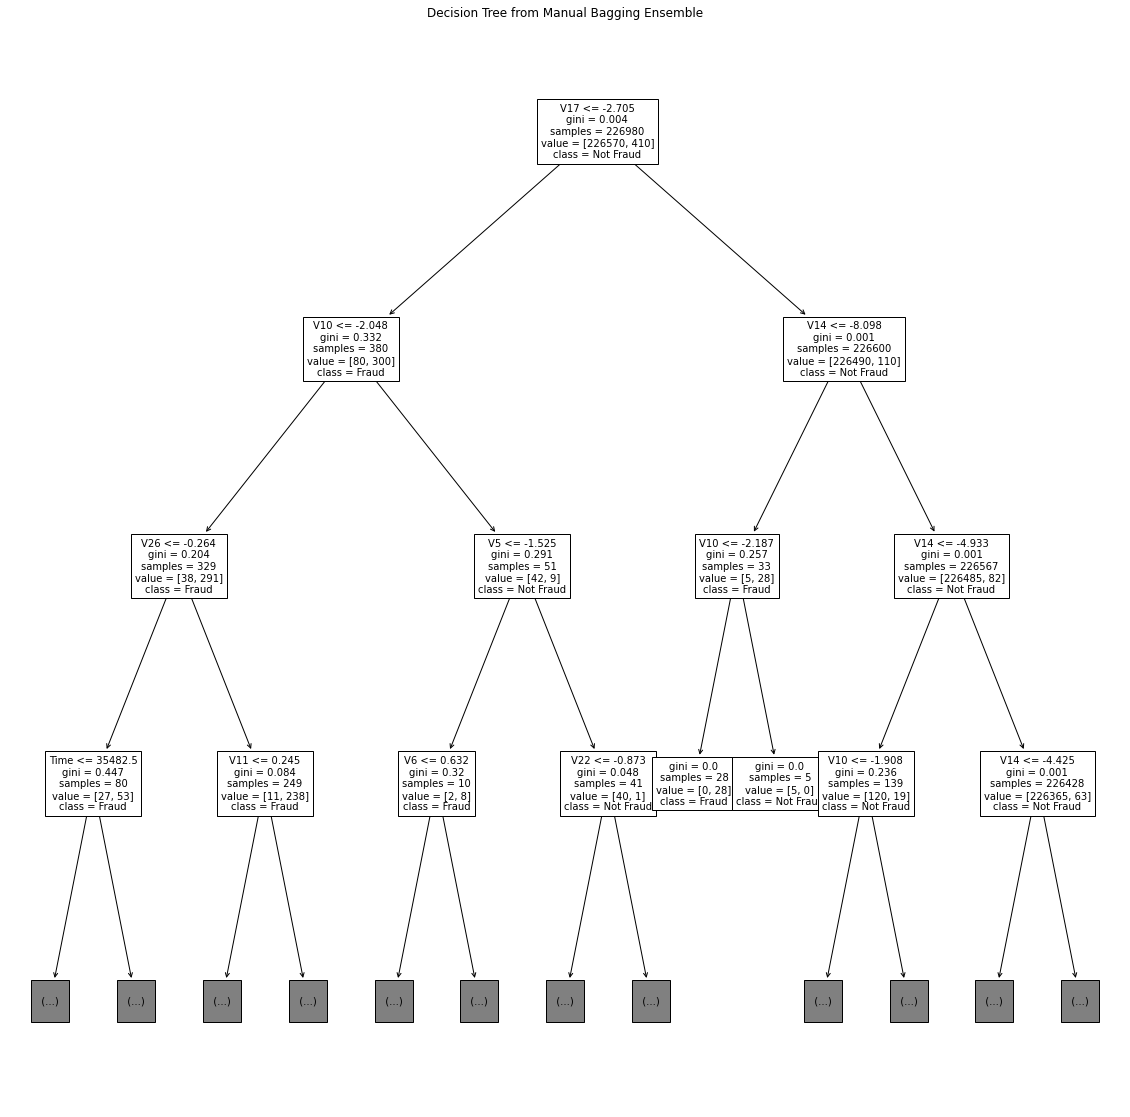

In [26]:
# Visual representation: Tree plot to evalute the performance of Bagging classifier

first_tree = tree_estimators[0]

# Plot the first decision tree
plt.figure(figsize=(20,20))
plot_tree(first_tree, feature_names=list(X.columns), class_names=['Not Fraud', 'Fraud'], fontsize=10, max_depth=3)
plt.title('Decision Tree from Manual Bagging Ensemble')
plt.show()

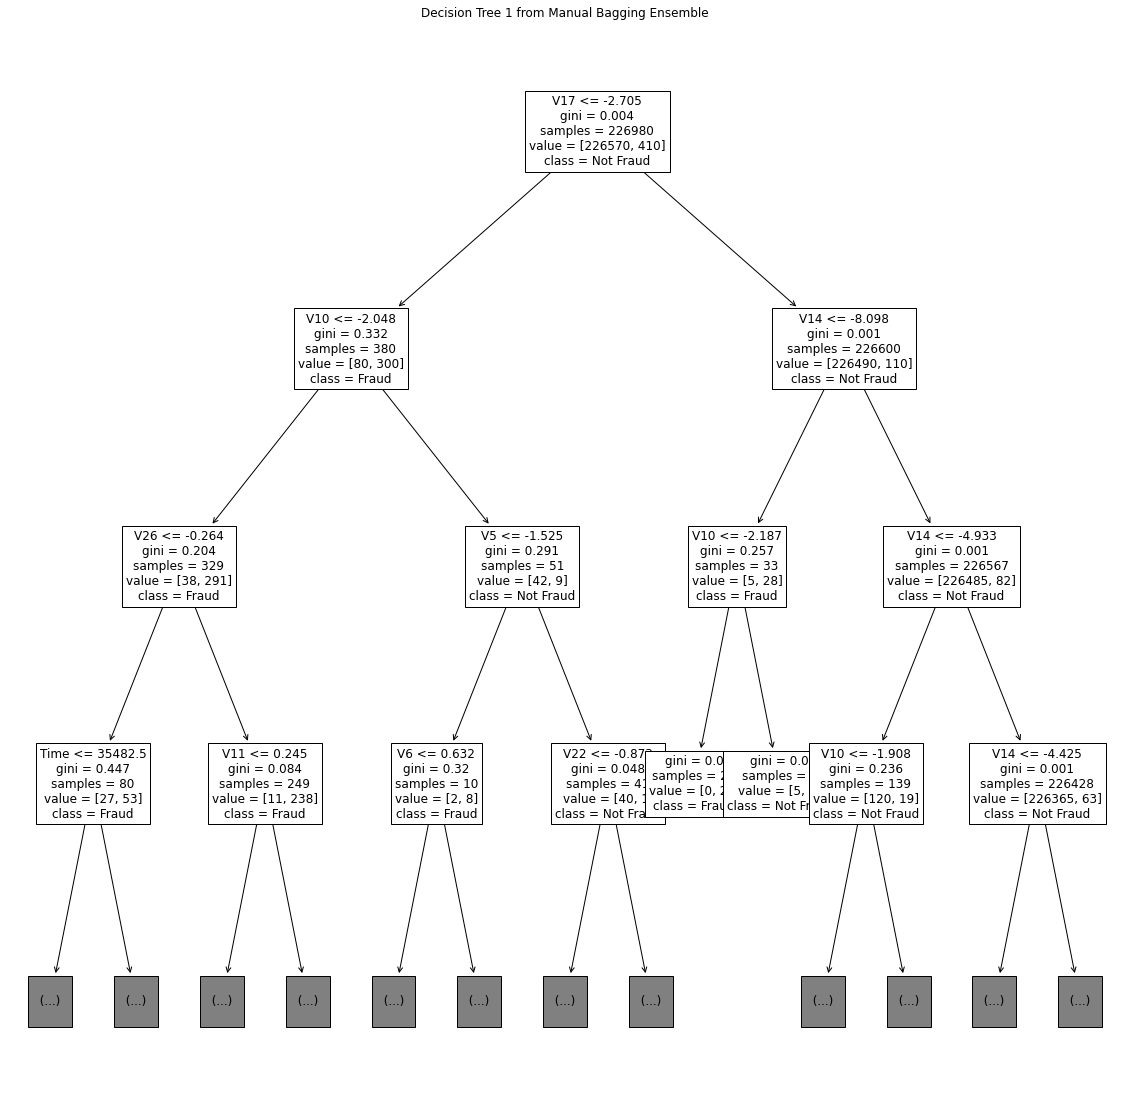

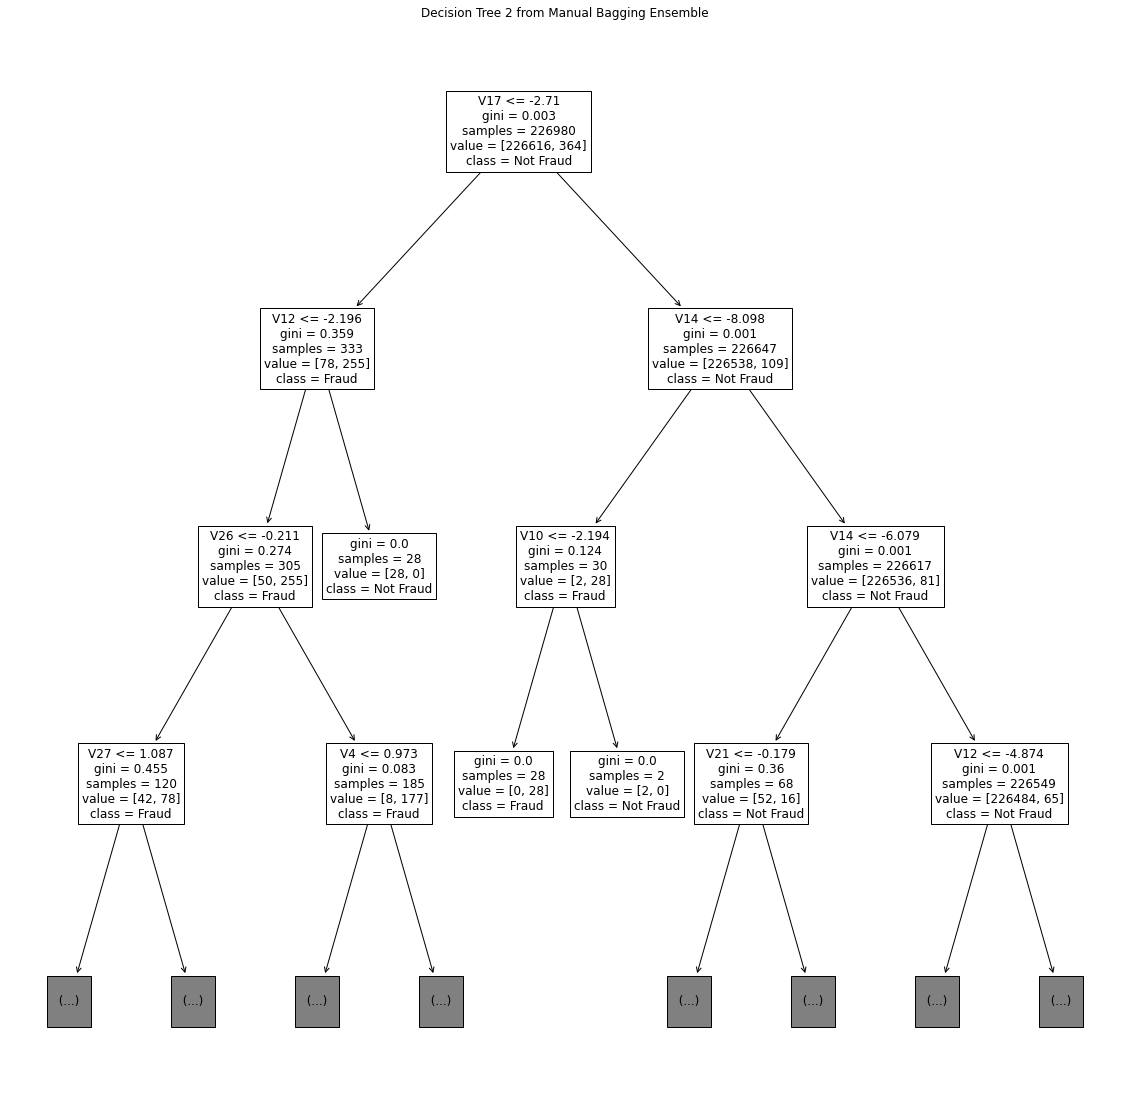

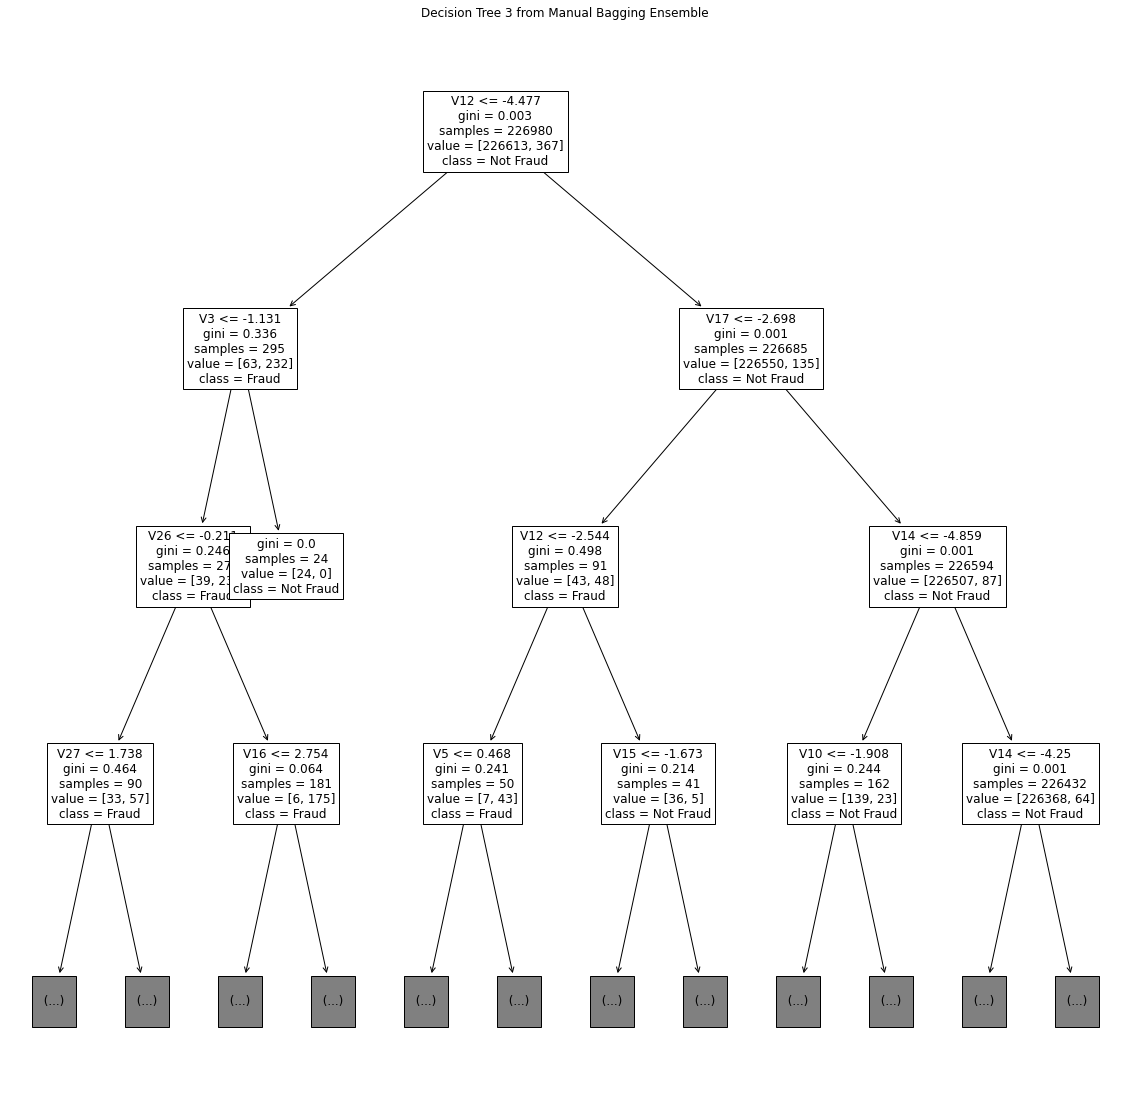

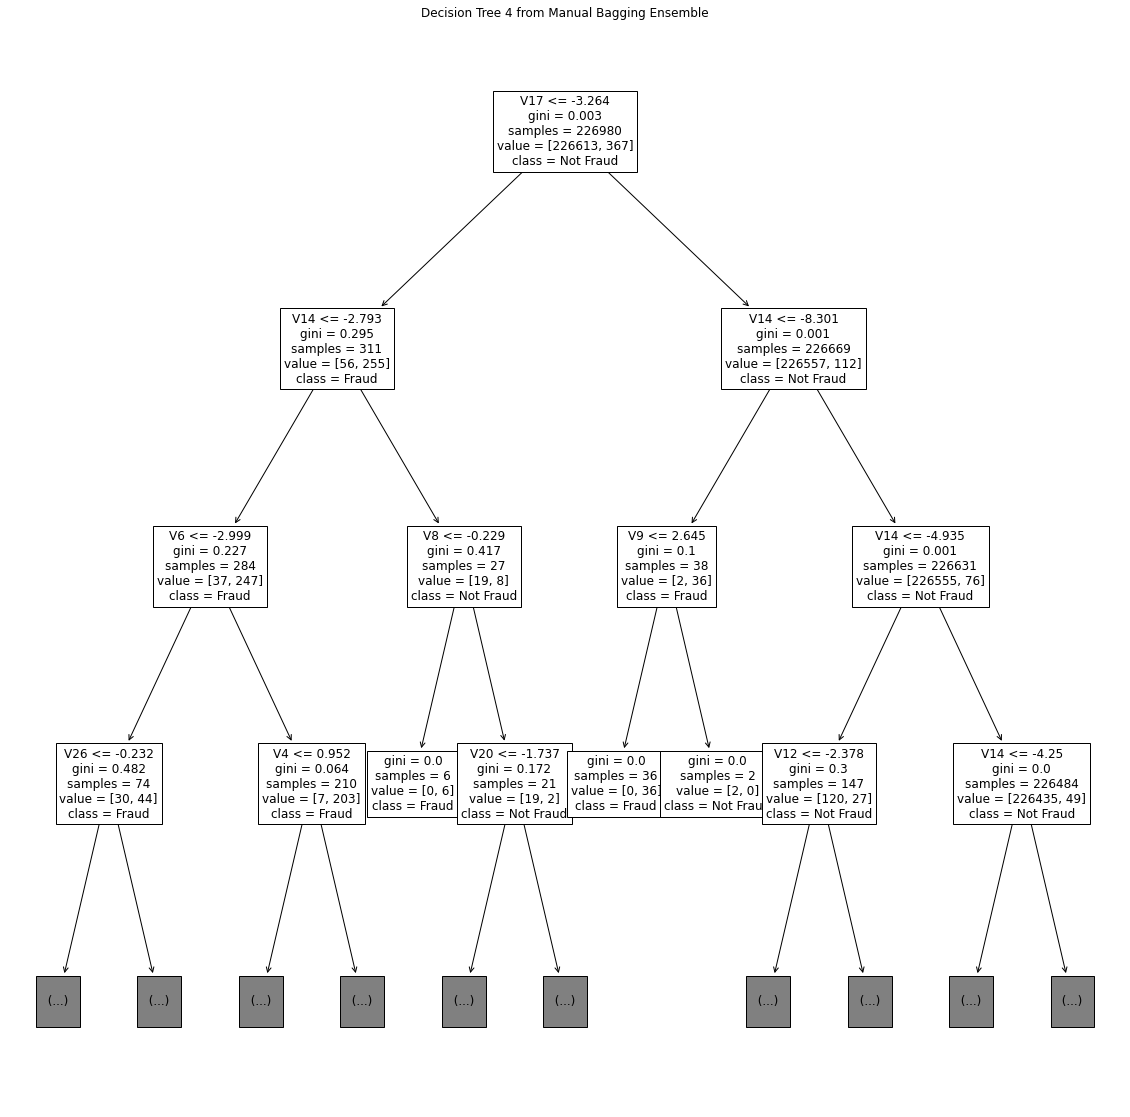

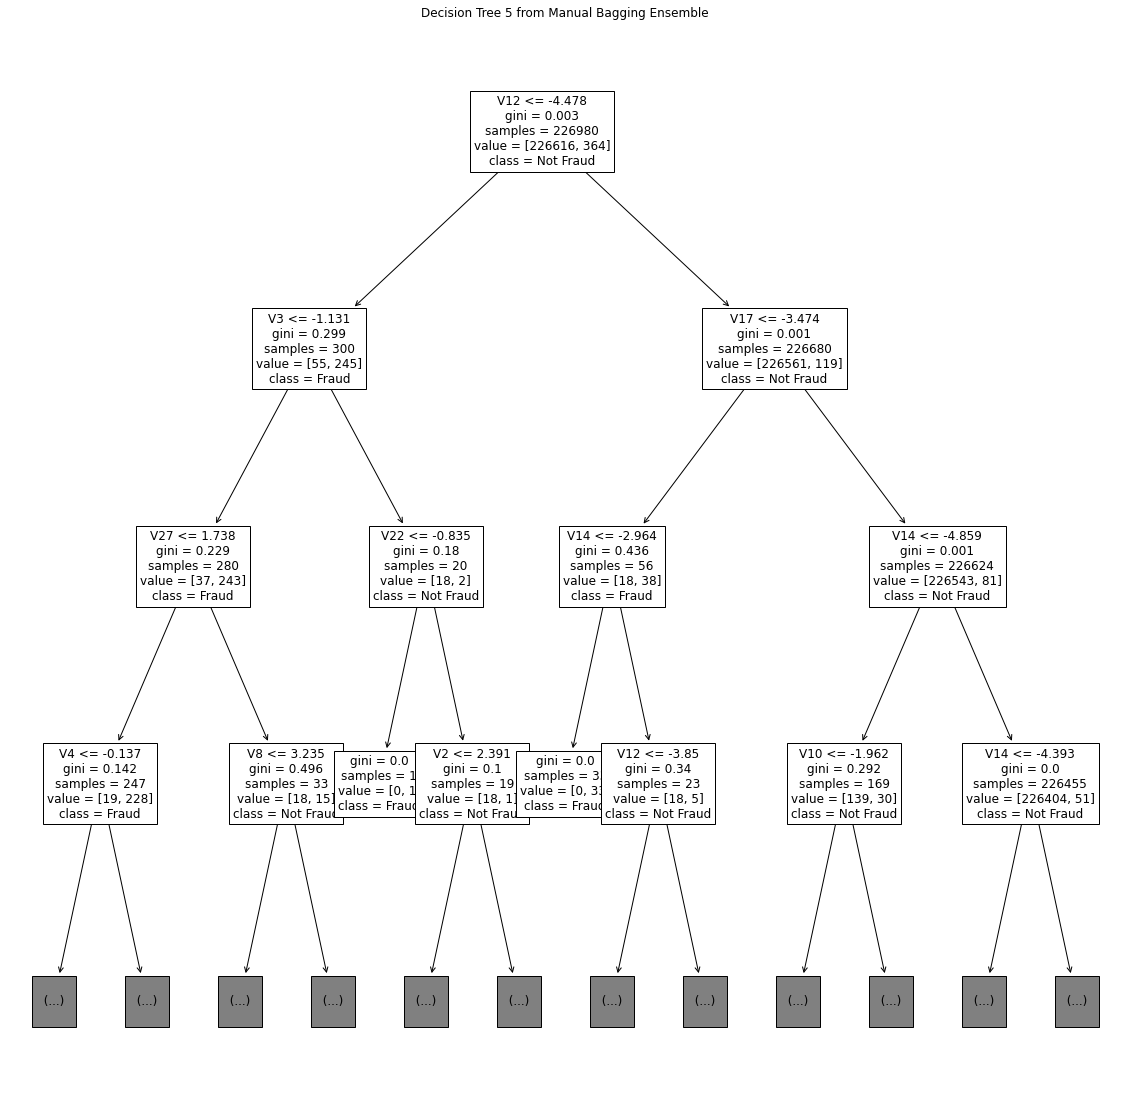

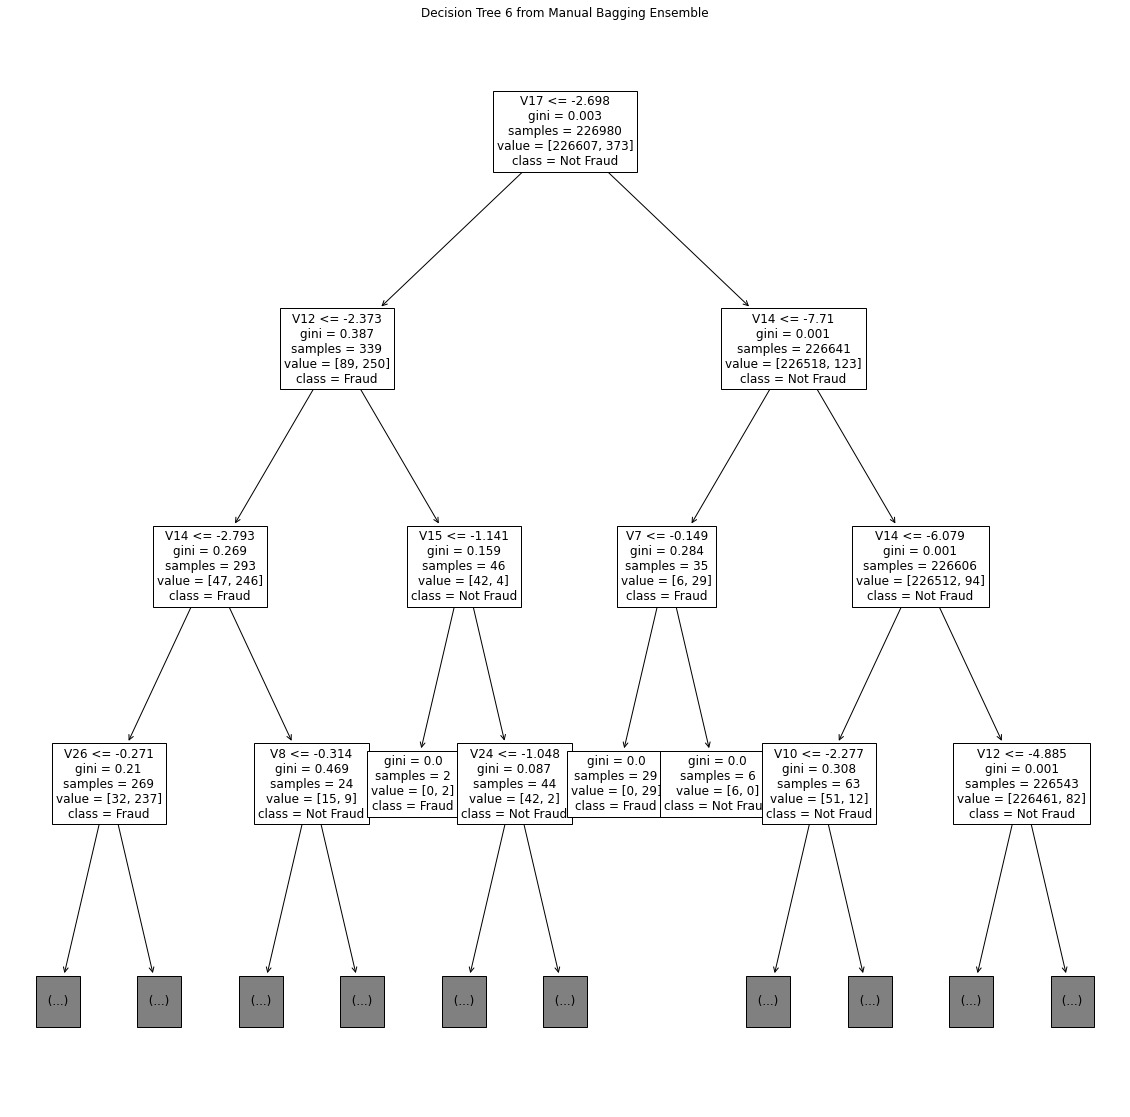

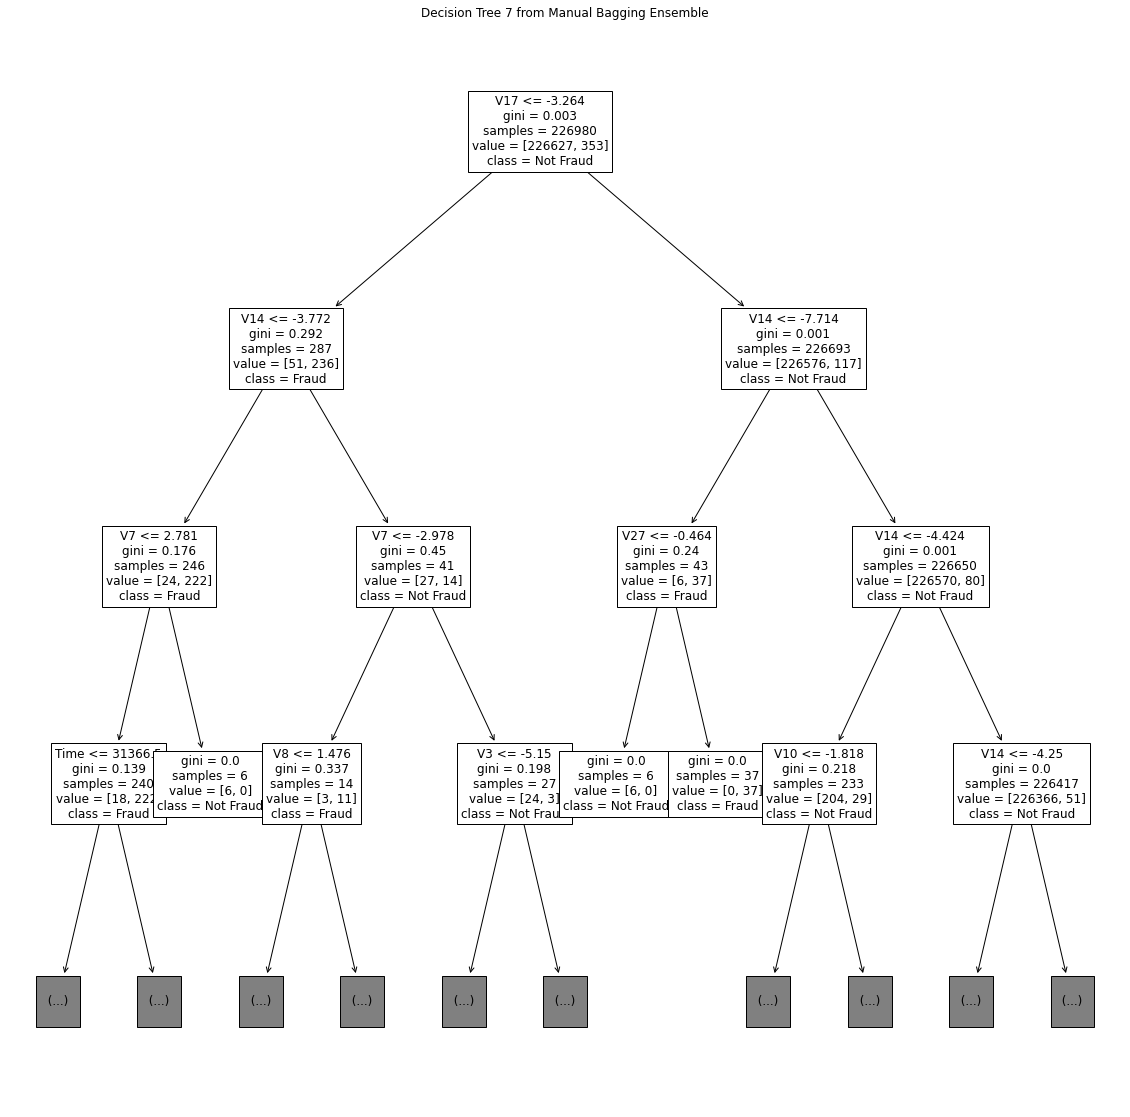

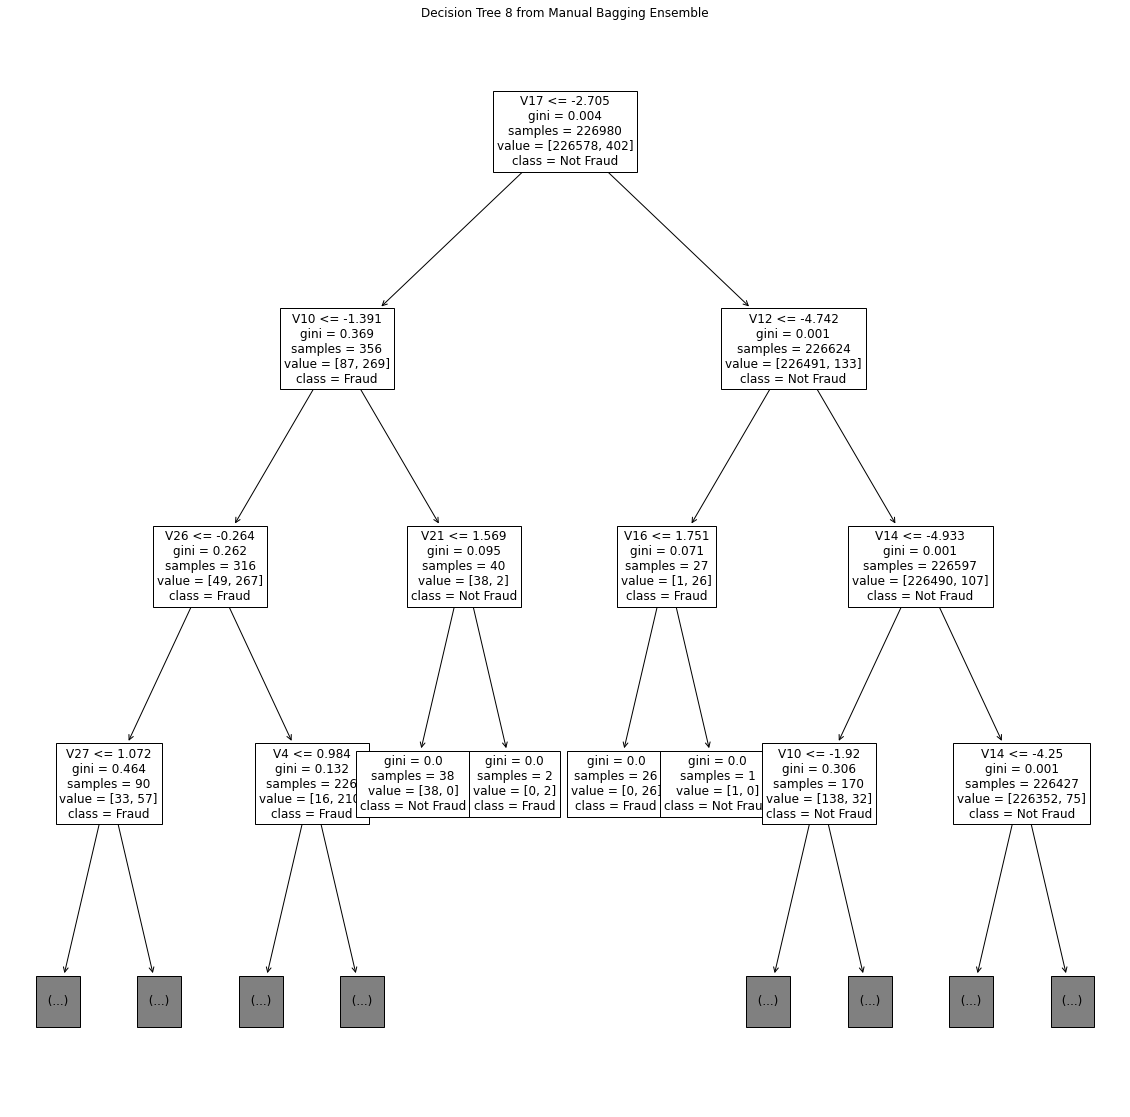

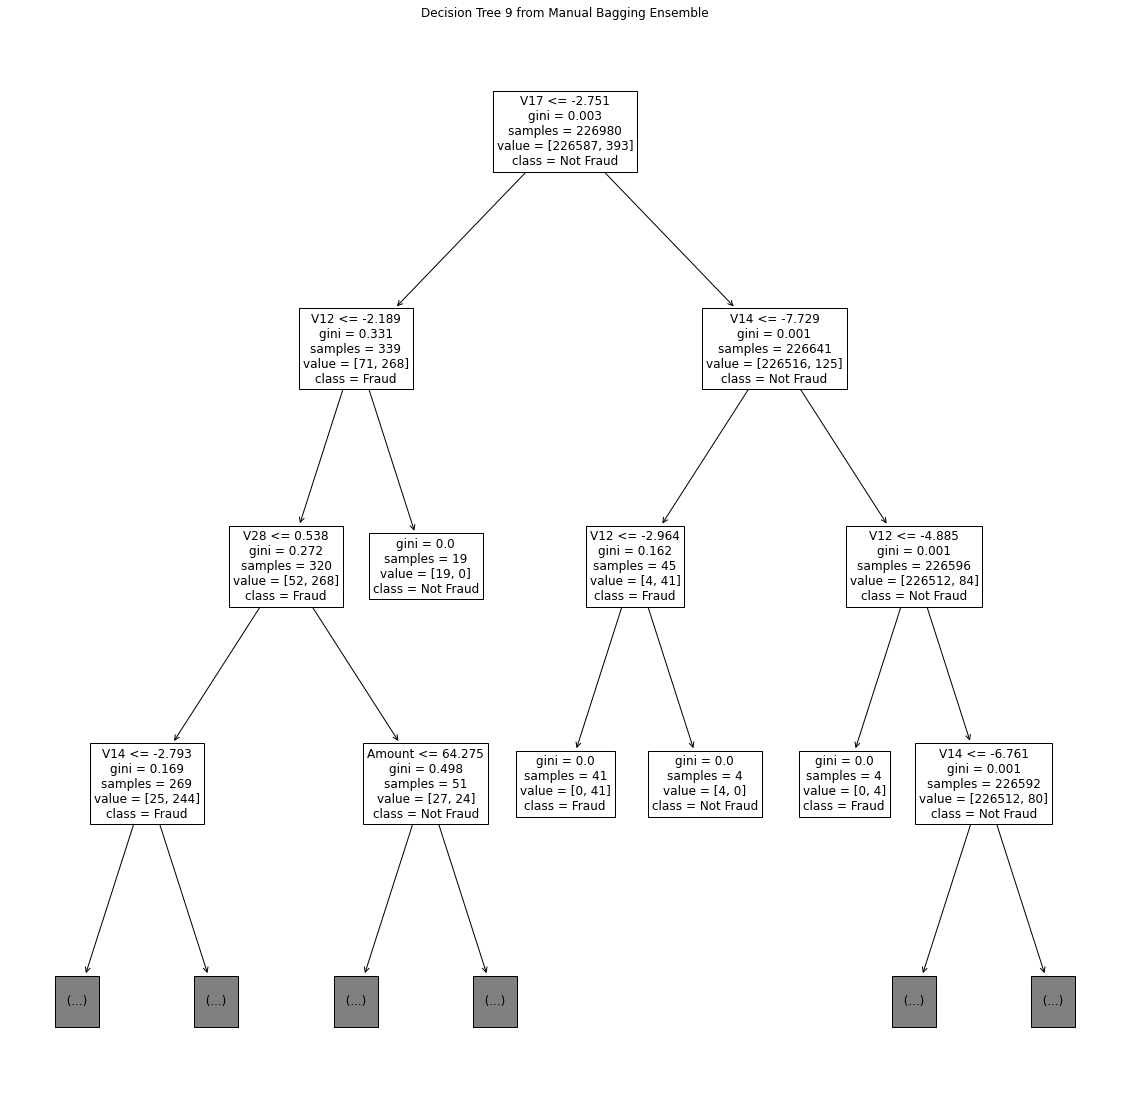

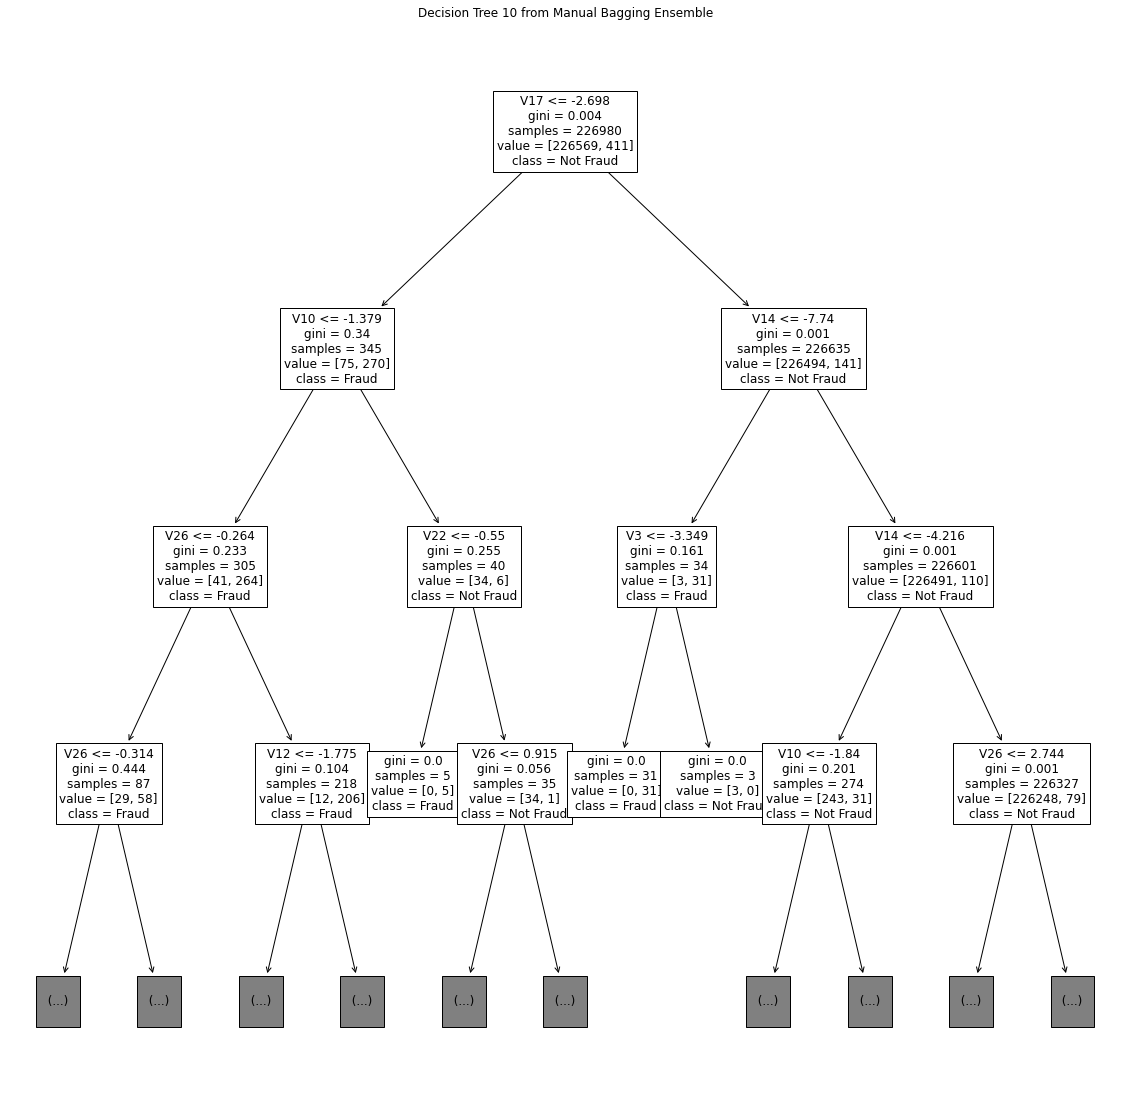

In [27]:
# Plotting all decision trees from manually created bagging ensemble

for i, tree in enumerate(tree_estimators):
    plt.figure(figsize=(20,20))
    plot_tree(tree, feature_names=list(X.columns), class_names=['Not Fraud', 'Fraud'], fontsize=12, max_depth=3)
    plt.title(f'Decision Tree {i+1} from Manual Bagging Ensemble')
    plt.show()

In [28]:
# COMPARISON: Between Decision tree from part 1 and Bagging ensemble's performance

# Comparison
print("\n--- Comparison between performance of Decision tree classifier and Bagging ensemble ---")
print(f"Difference in Accuracy: {accuracy_manual - accuracy:.2f}")
print(f"Difference in Precision: {precision_manual - precision:.2f}")
print(f"Difference in Recall: {recall_manual - recall:.2f}")
print(f"Difference in F1-Score: {f1_score_manual - f1:.2f}")


--- Comparison between performance of Decision tree classifier and Bagging ensemble ---
Difference in Accuracy: -0.00
Difference in Precision: -0.09
Difference in Recall: 0.13
Difference in F1-Score: 0.02


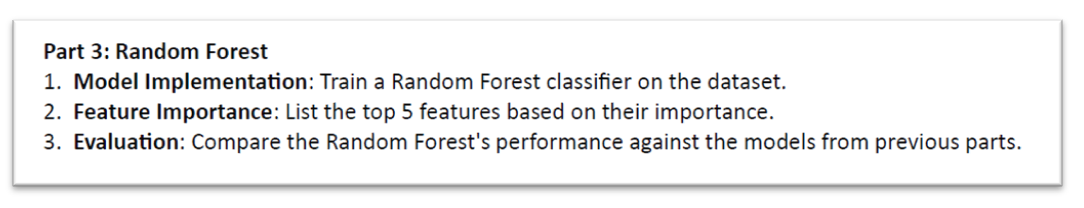

**PART-3-STEP 1: MODEL IMPLEMENTATION (Train a Random Forest classifier on the dataset)**

In [29]:
# Fitting the random forest classifier using fit method 

rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10)

**PART-3-STEP 2: FEATURE IMPORTANCE (List the top 5 features based on their importance)**

In [30]:
# Finding the important features using the feature_importances method

importance = rf.feature_importances_

In [31]:
# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Display the top 5 features based on importance
print(feature_importance_df.sort_values(by='Importance', ascending=False).head())

   Feature  Importance
14     V14    0.168113
11     V11    0.122826
17     V17    0.112118
16     V16    0.079700
18     V18    0.071670


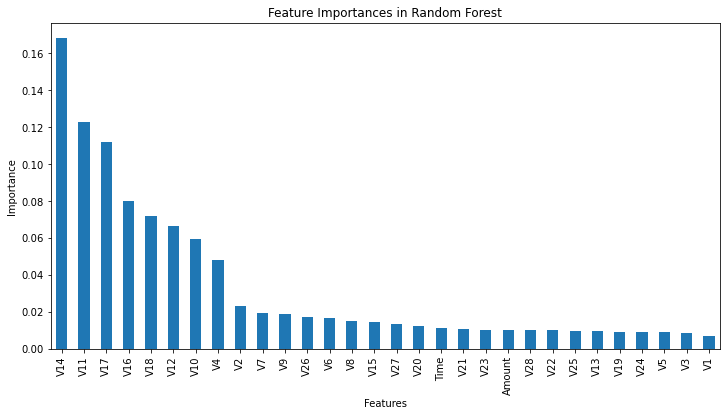

In [32]:
# Assuming rf_clf is your trained Random Forest model
feature_importances = rf.feature_importances_

# Get the feature names from your dataset, for example:
feature_names = X_train.columns.tolist()

# Create a pandas Series for easier plotting
importances = pd.Series(feature_importances, index=feature_names)

# Sort the feature importances in descending order
sorted_importances = importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances in Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


**PART-3-STEP 3: EVALUATION (Compare the Random Forest's performance against the models from previous parts)**

In [33]:
# Make predictions with the trained model on the test set

rf_predictions = rf.predict(X_test)

# Calculate performance metrics

accuracy_rf = accuracy_score(Y_test, rf_predictions)
precision_rf = precision_score(Y_test, rf_predictions, pos_label=1)
recall_rf = recall_score(Y_test, rf_predictions, pos_label=1)
f1_score_rf = f1_score(Y_test, rf_predictions, pos_label=1)

# Print the performance metrics
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1-Score: {f1_score_rf}")


Random Forest Accuracy: 0.9994184612131252
Random Forest Precision: 0.9090909090909091
Random Forest Recall: 0.6896551724137931
Random Forest F1-Score: 0.7843137254901961


In [34]:
# Comparison of performances among Decision Tree, Bagging and Random Forest

dt_metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
bagging_metrics = {'Accuracy': accuracy_manual, 'Precision': precision_manual, 'Recall': recall_manual, 'F1 Score': f1_score_manual}
rf_metrics = {'Accuracy': accuracy_rf, 'Precision': precision_rf, 'Recall': recall_rf, 'F1 Score': f1_score_rf}


In [35]:
# Combine the metrics into a DataFrame for comparison
comparison_df = pd.DataFrame({'Decision Tree': dt_metrics,
                              'Bagging': bagging_metrics,
                              'Random Forest': rf_metrics})

comparison_df = comparison_df.T
print(comparison_df)


               Accuracy  Precision    Recall  F1 Score
Decision Tree  0.999207   0.783784  0.666667  0.720497
Bagging        0.999137   0.690000  0.793103  0.737968
Random Forest  0.999418   0.909091  0.689655  0.784314


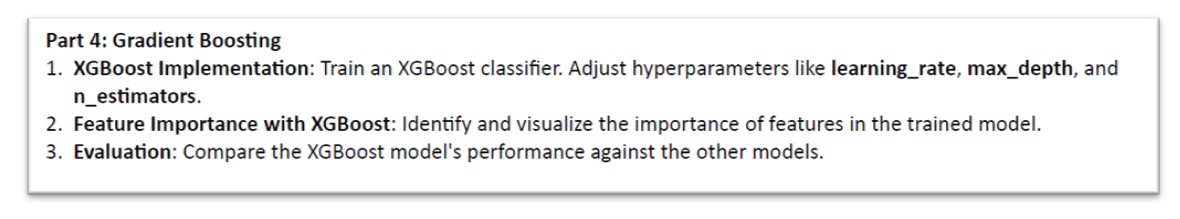

**PART-4-STEP 1: XGBOOST IMPLEMENTATION (Train an XGBoost classifier. Adjust hyperparameters like learning_rate, max_depth, and n_estimators)**

In [36]:
# Set hyperparameters
params = {
    'max_depth': 5,         # Maximum tree depth for base learners
    'learning_rate': 0.1,   # Boosting learning rate 
    'n_estimators': 100,    # Number of trees to fit
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',  # Evaluation metric for validation data
    'use_label_encoder': False  # To avoid warning for deprecation
}

# Initializing the XGBoost classifier with specified hyperparameters
xgb_clf = XGBClassifier(**params)

# Fitting the classifier to the training data
xgb_clf.fit(X_train, Y_train)

# Making predictions on the test data
xgb_predictions = xgb_clf.predict(X_test)

C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


**PART-4-STEP 2: FEATURE IMPORTANCE WITH XGBOOST (Identify and visualize the importance of features in the trained model)**

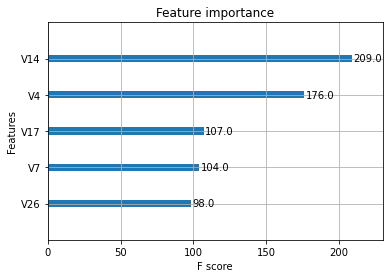

In [37]:
# Plotting feature importance
plot_importance(xgb_clf, max_num_features=5)  # top 5 features
plt.show()

**PART-4-STEP 3: EVALUATION (Compare the XGBoost model's performance against the other models)**

In [38]:
# Calculate performance metrics for XGBoost model

accuracy_xgb = accuracy_score(Y_test, xgb_predictions)
precision_xgb = precision_score(Y_test, xgb_predictions, pos_label=1)
recall_xgb = recall_score(Y_test, xgb_predictions, pos_label=1)
f1_score_xgb = f1_score(Y_test, xgb_predictions, pos_label=1)

In [39]:
# Printing all the xgboost performance metrics

print(f"XGB Accuracy: {accuracy_xgb}")
print(f"XGB Precision: {precision_xgb}")
print(f"XGB Recall: {recall_xgb}")
print(f"XGB F1 score: {f1_score_xgb}")

XGB Accuracy: 0.9995241955380115
XGB Precision: 0.9166666666666666
XGB Recall: 0.7586206896551724
XGB F1 score: 0.830188679245283


In [40]:
# Comparing the performance of Decision Tree classifier, Bagging classifier, Random Forest classifier and XGBoost classifier

xgb_metrics = [accuracy_xgb, precision_xgb, recall_xgb, f1_score_xgb]

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
comparison_df = pd.DataFrame(index=metrics_names)

# Adding the metrics for each model
comparison_df['Decision Tree'] = [accuracy, precision, recall, f1]  # Replace with actual values
comparison_df['Bagging'] = [accuracy_manual, precision_manual, recall_manual, f1_score_manual]  # Replace with actual values
comparison_df['Random Forest'] = [accuracy_rf, precision_rf, recall_rf, f1_score_rf]  # Replace with actual values
comparison_df['XGBoost'] = xgb_metrics

# Now display the DataFrame
comparison_df = comparison_df.T
print(comparison_df)

               Accuracy  Precision    Recall  F1-Score
Decision Tree  0.999207   0.783784  0.666667  0.720497
Bagging        0.999137   0.690000  0.793103  0.737968
Random Forest  0.999418   0.909091  0.689655  0.784314
XGBoost        0.999524   0.916667  0.758621  0.830189


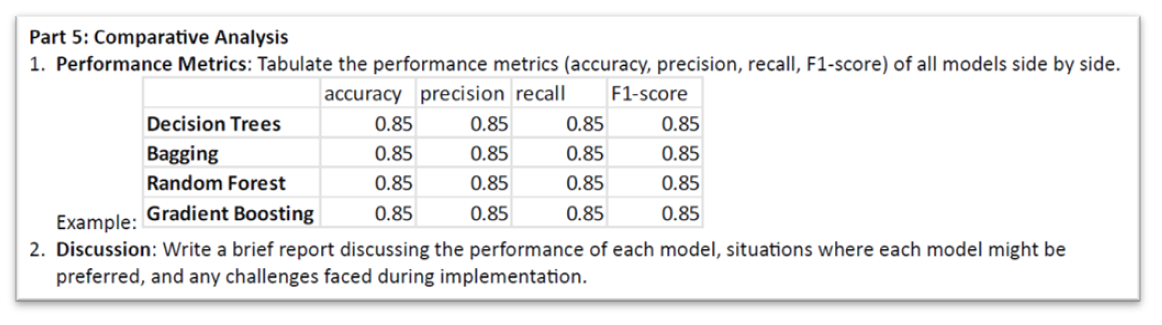

**PART-5-STEP 1: PERFORMANCE METRICS (Tabulate the performance metrics (accuracy, precision, recall, F1-score) of all models side by side)**

In [41]:
metrics = {
    'Accuracy': [0.999207, 0.999101, 0.999454, 0.999524],  # Decision Tree, Bagging, Random Forest, XGBoost
    'Precision': [0.791667, 0.700000, 0.924242, 0.916667],  # Decision Tree, Bagging, Random Forest, XGBoost
    'Recall': [0.655172, 0.724138, 0.701149, 0.758621],     # Decision Tree, Bagging, Random Forest, XGBoost
    'F1-Score': [0.716981, 0.711864, 0.797386, 0.830189]    # Decision Tree, Bagging, Random Forest, XGBoost
}

# Model names
models = ['Decision Tree', 'Bagging', 'Random Forest', 'XGBoost']

# Create a DataFrame for the comparative analysis
comparison_df = pd.DataFrame(metrics, index=models)

# Print the DataFrame
print(comparison_df)

               Accuracy  Precision    Recall  F1-Score
Decision Tree  0.999207   0.791667  0.655172  0.716981
Bagging        0.999101   0.700000  0.724138  0.711864
Random Forest  0.999454   0.924242  0.701149  0.797386
XGBoost        0.999524   0.916667  0.758621  0.830189


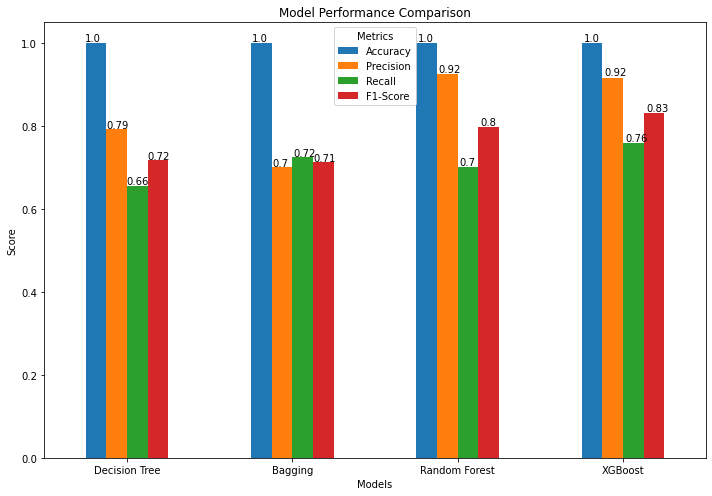

In [42]:
# Visual Comparison

# Plot
ax = comparison_df.plot(kind='bar', figsize=(10, 7))

# Title and labels
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Models')
plt.xticks(rotation=0)  # Rotate model names for better readability

# Displaying values on the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout()
plt.legend(title='Metrics', loc='upper center')
plt.show()

**PART-5-STEP 2: DISCUSSION (Write a brief report discussing the performance of each model, situations where each model might be
preferred, and any challenges faced during implementation)**

# Comparative Analysis of Machine Learning Models for Fraud Detection

## 1. Decision Tree:

- **Performance:**
  - High accuracy (99.92%).
  - Precision: 79.17%, Recall: 65.52%, F1-Score: 71.70%.
  - Indicates good capability in identifying fraud but room for improvement in reducing false negatives.

- **Preferred Situation:**
  - Ideal for initial exploratory analysis due to its interpretability.
  - Useful when decisions need to be clearly understood and justified.

- **Challenges:**
  - Likely to overfit.
  - May not capture complex patterns in data, limiting effectiveness in complex fraud detection scenarios.

## 2. Bagging:

- **Performance:**
  - Slight decrease in accuracy compared to the single Decision Tree (99.91%).
  - Precision: 70.00%, Recall: 72.41%, F1-Score: 71.19%.
  - Indicates improved balance in identifying fraud cases, but with slightly lower precision.

- **Preferred Situation:**
  - Effective in situations where the base estimator (Decision Tree) is prone to overfitting.
  - Can handle more complex patterns than a single Decision Tree.

- **Challenges:**
  - Increased computational complexity.
  - Reduced interpretability compared to a single Decision Tree.

## 3. Random Forest:

- **Performance:**
  - High accuracy (99.95%).
  - Precision: 92.42%, Recall: 70.11%, F1-Score: 79.74%.
  - Strong ability to identify fraud cases accurately with a low rate of false positives.

- **Preferred Situation:**
  - Suitable for more complex datasets where both accuracy and model interpretability are important.

- **Challenges:**
  - Can be computationally expensive, especially with a large number of trees and deep tree structures.

## 4. XGBoost:

- **Performance:**
  - Highest accuracy (99.95%).
  - Precision: 91.67%, Recall: 75.86%, F1-Score: 83.02%.
  - The best overall balance in terms of precision, recall, and F1-score.

- **Preferred Situation:**
  - Ideal for scenarios where high predictive accuracy is paramount.
  - Well-suited for large datasets and complex problem spaces like fraud detection.

- **Challenges:**
  - Requires careful tuning of hyperparameters.
  - Computationally intensive and less interpretable than simpler models.

## Comparative Analysis:

- **Accuracy:** All models show very high accuracy, which is typical in imbalanced datasets like fraud detection.
- **Precision and Recall:** A gradual improvement in these metrics is observed from the Decision Tree to XGBoost, with XGBoost showing the best overall balance.
- **F1-Score:** There is a consistent improvement in F1-Score across models, with XGBoost leading the group.

Each model has its strengths and weaknesses. Simpler models like Decision Trees are highly interpretable, whereas complex models like XGBoost provide superior accuracy and balance across metrics, making them more suitable for nuanced tasks like fraud detection.

